In [2]:
!pip install tabulate

In [78]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,expon,t,ttest_ind,norm
from statsmodels.stats.proportion import proportions_ztest

In [6]:
insurance_data = pd.read_csv("insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## **ANALISA DESCRIPTIVE ANALITIC**

In [14]:
# Berapa rata-rata umur pengguna asuransi?

soal_1 = round(insurance_data['age'].mean())

print('Rata-rata umur pengguna asuransi adalah', soal_1)

Rata-rata umur pengguna asuransi adalah 39


In [15]:
# Berapa rata - rata umur pengguna asuransi yang merokok?

soal_2 = round(insurance_data.age[insurance_data['smoker']=='yes'].mean())

print('Rata-rata umur pengguna asuransi yang merokok adalah', soal_2)

Rata-rata umur pengguna asuransi yang merokok adalah 39


In [19]:
# Berapa rata-rata nilai BMI pengguna asuransi pada data insurance tersebut

print('Rata-rata nilai BMI pengguna asuransi pada data adalah %.2f' %(insurance_data['bmi'].mean()))

Rata-rata nilai BMI pengguna asuransi pada data adalah 30.66


In [22]:
# Berapa rata-rata nilai BMI pengguna asuransi yang merokok pada data insurance tersebut

print('Rata-rata nilai BMI pengguna yang merokok adalah %.2f'% insurance_data.bmi[insurance_data['smoker']=='yes'].mean())

Rata-rata nilai BMI pengguna yang merokok adalah 30.71


In [23]:
# Perbandingan rata-rata umur perempuan dan laki-laki yang merokok
smoker = insurance_data[insurance_data['smoker']=='yes']
print('Rata-rata umur perokok perempuan', round(smoker.age[smoker['sex']=='female'].mean()))
print('Rata-rata umur perokok laki-laki', round(smoker.age[smoker['sex']=='male'].mean()))

Rata-rata umur perokok perempuan 39
Rata-rata umur perokok laki-laki 38


In [27]:
# Perbedaan rata-rata tagihan kesehatan perokok dan non perokok
print('Rata-rata tagihan kesehatan perokok', round(insurance_data.charges[insurance_data['smoker']=='yes'].mean()))
print('Rata-rata tagihan kesehatan non perokok', round(insurance_data.charges[insurance_data['smoker']=='no'].mean()))

Rata-rata tagihan kesehatan perokok 32050
Rata-rata tagihan kesehatan non perokok 8434


In [30]:
# Perbandingan rata-rata tagihan kesehatan perokok dan non perokok dengan BMI diatas 25
bmi25 = insurance_data[insurance_data['bmi']>25]
print('Rata-rata tagihan kesehatan perokok dengan BMI diatas 25:', round(bmi25.charges[bmi25['smoker']=='yes'].mean()))
print('Rata-rata tagihan kesehatan non perokok dengan BMI diatas 25:', round(bmi25.charges[bmi25['smoker']=='no'].mean()))

Rata-rata tagihan kesehatan perokok dengan BMI diatas 25: 35117
Rata-rata tagihan kesehatan non perokok dengan BMI diatas 25: 8630


In [34]:
# Perbandingan BMI berdasarkan jenis kelamin
print('Rata-rata BMI perempuan %.2f'% insurance_data.bmi[insurance_data['sex']=='female'].mean())
print('Rata-rata BMI laki-laki %.2f'% insurance_data.bmi[insurance_data['sex']=='male'].mean())

Rata-rata BMI perempuan 30.38
Rata-rata BMI laki-laki 30.94


In [35]:
# Perbandingan BMI berdasarkan smoker dan non smoker
print('Rata-rata BMI perokok %.2f'% insurance_data.bmi[insurance_data['smoker']=='yes'].mean())
print('Rata-rata BMI non perokok %.2f'% insurance_data.bmi[insurance_data['smoker']=='no'].mean())

Rata-rata BMI perokok 30.71
Rata-rata BMI non perokok 30.65


## **ANALISA VARIABEL KATEGORIK**

In [45]:
# Besaran tagihan antara perempuan dan laki-laki
pr = round(insurance_data.charges[insurance_data['sex']=='female'].sum())
lk = round(insurance_data.charges[insurance_data['sex']=='male'].sum())
print('Besaran tagihan perempuan adalah %.2f'%pr)
print('Besaran tagihan laki-laki adalah %.2f'%lk)

Besaran tagihan perempuan adalah 8321061.00
Besaran tagihan laki-laki adalah 9434764.00


In [42]:
# persentase besaran tagihan antara perempuan dan laki-laki
total_charges = insurance_data.charges.sum()
pr = insurance_data.charges[insurance_data['sex']=='female'].sum()/total_charges
lk = insurance_data.charges[insurance_data['sex']=='male'].sum()/total_charges
print('persentase besaran tagihan perempuan adalah %.2f'%pr)
print('persentase besaran tagihan laki-laki adalah %.2f'%lk)

persentase besaran tagihan perempuan adalah 0.47
persentase besaran tagihan laki-laki adalah 0.53


In [50]:
# Distribusi peluang tagihan di tiap-tiap region
prob_by_region = insurance_data.groupby(['region']).sum()[['charges']]
prob_by_region = prob_by_region.reset_index()
prob_by_region['total_charges'] = prob_by_region['charges'].sum()
prob_by_region['probability'] = prob_by_region['charges'] / prob_by_region['total_charges'] 
prob_by_region

,region,charges,total_charges,probability
0,northeast,4.343669e+06,1.775582e+07,0.244633
1,northwest,4.035712e+06,1.775582e+07,0.227289
2,southeast,5.363690e+06,1.775582e+07,0.302081
3,southwest,4.012755e+06,1.775582e+07,0.225997


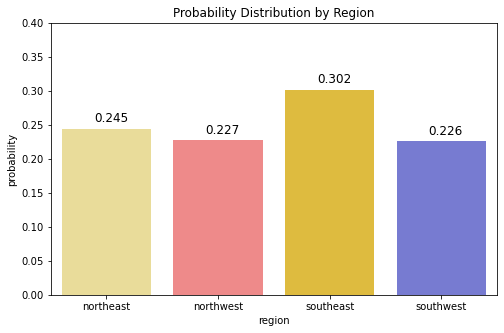

In [59]:
flatui = ["#f6e58d", "#ff7979", "#f9ca24", "#686de0"]

sns.set_palette(flatui)

plt.figure(figsize=(8,5))
sns.barplot(x='region', y='probability', data=prob_by_region, palette=sns.color_palette())

x = prob_by_region['region']
y = prob_by_region['probability']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.112, y = y[i]+0.01, s = round(y[i], 3), size = 12) # add data points
    
plt.ylim(0, 0.4);
plt.title('Probability Distribution by Region')
plt.show()

In [61]:
# 2.3 Proporsi data tiap region
proportion = insurance_data.groupby(['region']).count()[['charges']]
proportion = proportion.reset_index()
proportion['total_charges'] = proportion['charges'].sum()
proportion['proportion'] = (proportion['charges'] / proportion['total_charges'])*100
proportion

,region,charges,total_charges,proportion
0,northeast,324,1338,24.215247
1,northwest,325,1338,24.289985
2,southeast,364,1338,27.204783
3,southwest,325,1338,24.289985


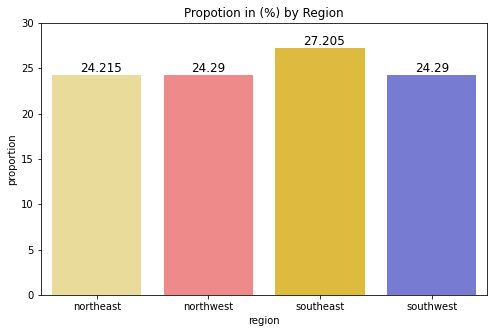

In [63]:
sns.set_palette(flatui)

plt.figure(figsize=(8,5))
sns.barplot(x='region', y='proportion', data=proportion, palette=sns.color_palette())

x = proportion['region']
y = proportion['proportion']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.15, y = y[i]+0.37, s = round(y[i], 3), size = 12) # add data points
    
plt.ylim(0, 30);
plt.title('Propotion in (%) by Region')
plt.show()

In [104]:
# 2.4 Proporsi perokok VS. non perokok
df_smoke_VS_non = insurance_data.groupby(['smoker']).count()[['charges']]
df_smoke_VS_non = df_smoke_VS_non.reset_index()
df_smoke_VS_non['total_charges'] = df_smoke_VS_non['charges'].sum()
df_smoke_VS_non['smoke_prop'] = (df_smoke_VS_non['charges'] / df_smoke_VS_non['total_charges'])*100
df_smoke_VS_non

,smoker,charges,total_charges,smoke_prop
0,no,1064,1338,79.521674
1,yes,274,1338,20.478326


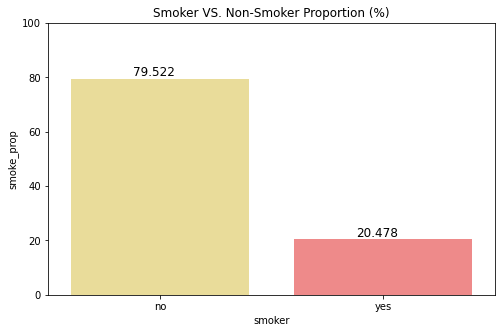

In [105]:
plt.figure(figsize=(8,5))
sns.barplot(x='smoker', y='smoke_prop', data=df_smoke_VS_non, palette=sns.color_palette())


x = df_smoke_VS_non['smoker']
y = df_smoke_VS_non['smoke_prop']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.12, y = y[i]+1, s = round(y[i], 3), size = 12) # add data points
    
plt.ylim(0, 100);
plt.title('Smoker VS. Non-Smoker Proportion (%)')
plt.show()

In [67]:
# Peluang Perokok Perempuan 
data_pr = insurance_data[insurance_data['sex']=='female']
count_pr = data_pr['smoker'].count()
smoker_pr = data_pr.smoker[data_pr['smoker']=='yes'].count()/count_pr

# Peluang Perokok Laki-Laki
data_lk = insurance_data[insurance_data['sex']=='male']
count_lk = data_lk['smoker'].count()
smoker_lk = data_lk.smoker[data_lk['smoker']=='yes'].count()/count_lk

print(f'Peluang perokok perempuan adalah %.2f'%smoker_pr)
print(f'Peluang perokok laki-laki adalah %.2f\n'%smoker_lk)

Peluang perokok perempuan adalah 0.17
Peluang perokok laki-laki adalah 0.24



In [69]:
# 2.7 Bentuk distribusi tagihan tiap-tiap region
insurance_data.groupby(['region']).count()[['charges']]

,charges
region,
northeast,324
northwest,325
southeast,364
southwest,325


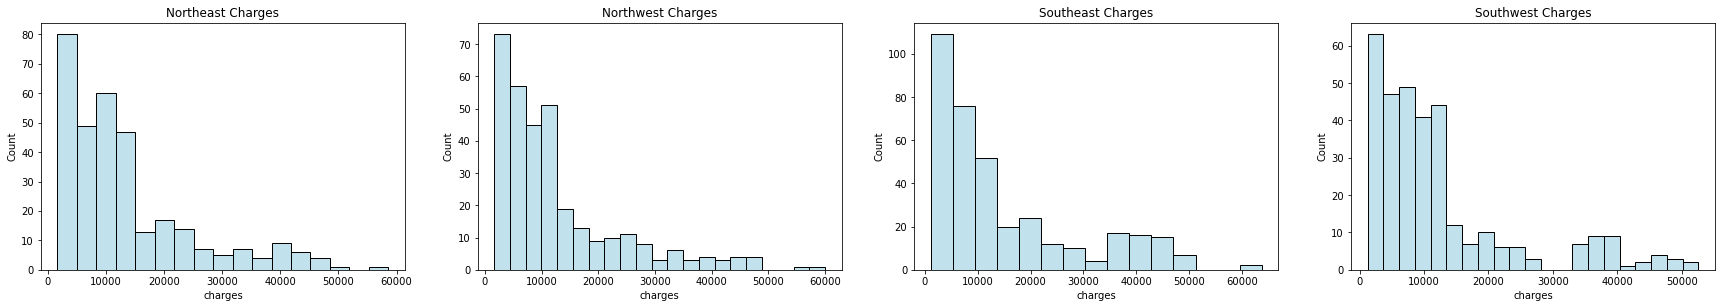

In [129]:
plt.figure(figsize = (30,10))
font = {'family': 'serif',
       'color' : 'black',
       'weight':'light',
       'size': '16'}

plt.subplot (2,4,1)
northeast = insurance_data[insurance_data['region'] == 'northeast']
northeast = northeast.drop(columns=['age', 'sex' ,'bmi', 'children', 'smoker' ])

sns.histplot(data = northeast, x='charges', color='lightblue')
plt.title('Northeast Charges')

plt.subplot (2,4,2)
northeast = insurance_data[insurance_data['region'] == 'northwest']
northeast = northeast.drop(columns=['age', 'sex' ,'bmi', 'children', 'smoker' ])

sns.histplot(data = northeast, x='charges', color='lightblue')
plt.title('Northwest Charges')

plt.subplot (2,4,3)
northeast = insurance_data[insurance_data['region'] == 'southeast']
northeast = northeast.drop(columns=['age', 'sex' ,'bmi', 'children', 'smoker' ])

sns.histplot(data = northeast, x='charges', color='lightblue')
plt.title('Southeast Charges')

plt.subplot (2,4,4)
northeast = insurance_data[insurance_data['region'] == 'southwest']
northeast = northeast.drop(columns=['age', 'sex' ,'bmi', 'children', 'smoker' ])

sns.histplot(data = northeast, x='charges', color='lightblue')
plt.title('Southwest Charges')


plt.show()

## **ANALISA VARIABEL KONTINU**

In [130]:
# Mencari peluang besar tagihan berdasarkan BMI
condition = (insurance_data['bmi']>=insurance_data['bmi'].min()) & (insurance_data['bmi']<=insurance_data['bmi'].max())
charges_bmi = insurance_data[condition]['charges']

for i in range(1,16700,1000):
  x = i
  mean = charges_bmi.mean()
  std = charges_bmi.std()
  P = round(1 - norm.cdf(x, mean, std),3)
  print(f'Peluang x>{x}: {P}')

Peluang x>1: 0.863
Peluang x>1001: 0.845
Peluang x>2001: 0.824
Peluang x>3001: 0.802
Peluang x>4001: 0.778
Peluang x>5001: 0.753
Peluang x>6001: 0.726
Peluang x>7001: 0.698
Peluang x>8001: 0.668
Peluang x>9001: 0.638
Peluang x>10001: 0.606
Peluang x>11001: 0.574
Peluang x>12001: 0.542
Peluang x>13001: 0.509
Peluang x>14001: 0.476
Peluang x>15001: 0.443
Peluang x>16001: 0.411


In [108]:
# Mengetahui peluang seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700.
condition = (insurance_data['bmi']>25) & (insurance_data['smoker']=='yes')
charges_bmi = insurance_data[condition]['charges']

x = 16700
mean = charges_bmi.mean()
std = charges_bmi.std()
P = 1 - norm.cdf(x, mean, std)
print('Peluang:%.3f'% P)

Peluang:0.957


In [109]:
# Mengetahui peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok
condition = (insurance_data['smoker']=='yes')
charges_bmi = insurance_data[condition]['charges']

x = 16700
mean = charges_bmi.mean()
std = charges_bmi.std()
P = 1 - norm.cdf(x, mean, std)
print('Peluang:%.3f'% P)

Peluang:0.908


In [94]:
# Mengetahui perbandingan peluang seseorang dengan BMI diatas dan dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k
condition1 = (insurance_data['bmi']>25)
charges_bmi1 = insurance_data[condition1]['charges']

condition2 = (insurance_data['bmi']<25)
charges_bmi2 = insurance_data[condition2]['charges']

x = 16700
mean1 = charges_bmi1.mean()
std1 = charges_bmi1.std()
mean2 = charges_bmi2.mean()
std2 = charges_bmi2.std()
P1 = 1 - norm.cdf(x, mean1, std1)
P2 = 1 - norm.cdf(x, mean2, std2)
print('Peluang seseorang memiliki BMI diatas 25 mendapat tagihan kesehatan diatas 16.7k: %.3f'% P1)
print('Peluang seseorang memiliki BMI dibawah 25 mendapat tagihan kesehatan diatas 16.7k:%.3f'%P2)

Peluang seseorang memiliki BMI diatas 25 mendapat tagihan kesehatan diatas 16.7k: 0.415
Peluang seseorang memiliki BMI dibawah 25 mendapat tagihan kesehatan diatas 16.7k:0.197


In [97]:
# Mengetahui perbandingan seseorang perokok dan non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,
condition1 = (insurance_data['bmi']>25) & (insurance_data['smoker']=='yes')
charges_bmi1 = insurance_data[condition1]['charges']

condition2 = (insurance_data['bmi']>25) & (insurance_data['smoker']=='no')
charges_bmi2 = insurance_data[condition2]['charges']

x = 16700
mean1 = charges_bmi1.mean()
std1 = charges_bmi1.std()
mean2 = charges_bmi2.mean()
std2 = charges_bmi2.std()
P1 = 1 - norm.cdf(x, mean1, std1)
P2 = 1 - norm.cdf(x, mean2, std2)
print('Peluang seseorang perokok memiliki BMI diatas 25 mendapat tagihan kesehatan diatas 16.7k:%.3f'%P1)
print('Peluang seseorang non perokok memiliki BMI diatas 25 mendapat tagihan kesehatan diatas 16.7k:%.3f'%P2)

Peluang seseorang perokok memiliki BMI diatas 25 mendapat tagihan kesehatan diatas 16.7k:0.957
Peluang seseorang non perokok memiliki BMI diatas 25 mendapat tagihan kesehatan diatas 16.7k:0.091


## **ANALISA KORELASI VARIABEL**

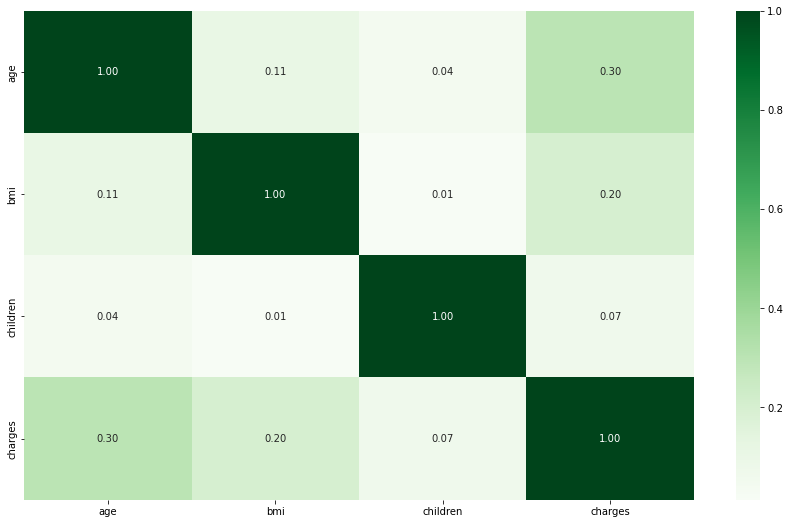

In [135]:
# Korelasi secara keseluruhan
plt.figure(figsize=(15,9))
sns.heatmap(insurance_data.corr(),annot=True, cmap = 'Greens', fmt = '.2f');
plt.show()

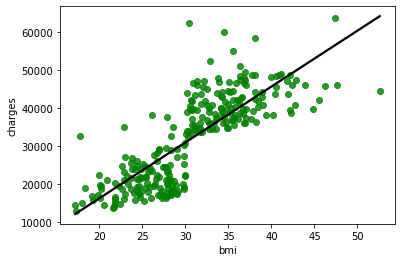

In [118]:
smoker_data = insurance_data[insurance_data["smoker"] == "yes"]
sns.regplot(x=smoker_data["bmi"],
            y=smoker_data["charges"], 
            data=smoker_data,
            ci=None,
            scatter_kws={"color": "green"}, line_kws={"color": "black"});
plt.show()

## **UJI HIPOTESIS**

In [99]:
# Mengambil sampel dari populasi perokok dan non perokok sebanyak 30 sampel
s_data1 = insurance_data.charges[insurance_data['smoker']=='yes'].sample(n=30,random_state=123) 
s_data2 = insurance_data.charges[insurance_data['smoker']=='no'].sample(n=30,random_state=123)

print('Jumlah sampel perokok',s_data1.count()) 
print('Jumlah sampel non perokok',s_data2.count())

# Nilai Significance Level
alpha = 0.05

# Nilai Critical Value berdasarkan critical t dari t-table dengan nilai alpha 0.05 dan degree of freedom 29 (df = n-1)
t_crit = -t.ppf(alpha,df=29)
print('Critical Value:%.2f'%(t_crit))

stat, p = ttest_ind(a = s_data1, b = s_data2, equal_var=False, alternative='greater') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.13f' % (stat, p))

# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Jumlah sampel perokok 30
Jumlah sampel non perokok 30
Critical Value:1.70
Statistics = 9.1843, p-value = 0.0000000000075
Two group means are different (Tolak H0)


In [136]:
p

0.7721175909265185

Maka dapat kita simpulkan bahwa Tagihan Perokok lebih besar dari Tagihan Non Perokok. Dari pengujian hipotesis diatas, kita mengambil kesimpulan bahwa Tagihan Perokok diatas rata rata Tagihan Non Perokok.

In [101]:
# Mengambil sampel dari populasi BMI diatas 25 dan BMI dibawah 25 sebanyak 30 sampel
s_bmi1 = insurance_data.charges[insurance_data['bmi']>25].sample(n=30,random_state=123) 
s_bmi2 = insurance_data.charges[insurance_data['bmi']<25].sample(n=30,random_state=123)

print('Jumlah sampel bmi diatas 25:',s_bmi1.count()) 
print('Jumlah sampel bmi dibawah 25:',s_bmi2.count())

alpha = 0.05

# Nilai Critical Value berdasarkan critical t dari t-table dengan nilai alpha 0.05 dan degree of freedom 29 (df = n-1)
t_crit = -t.ppf(alpha,df=29)
print('Critical Value:%.2f'%(t_crit))

stat, p = ttest_ind(a = s_bmi1, b = s_bmi2, equal_var=False, alternative='greater') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p))

# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Jumlah sampel bmi diatas 25: 30
Jumlah sampel bmi dibawah 25: 30
Critical Value:1.70
Statistics = 1.1712, p-value = 0.1234
Two group means are equal (Gagal tolak H0)


Maka dapat kita simpulkan bahwa Tagihan Kesehatan BMI diatas 25 lebih kecil dari Tagihan Kesehatan BMI dibawah 25. Dari pengujian hipotesis diatas, kita mengambil kesimpulan bahwa Tagihan Kesehatan BMI yang lebih dari 25 berada dibawah rata rata Tagihan Kesehatan BMI yang kurang dari 25.

In [102]:
# Data
s_clk = insurance_data.charges[insurance_data['sex']=='male'].sample(n=30,random_state=123)
s_cpr = insurance_data.charges[insurance_data['sex']=='female'].sample(n=30,random_state=123)
print('Jumlah sampel bmi laki-laki:',s_clk.count()) 
print('Jumlah sampel bmi perempuan:',s_cpr.count())

# Significance level
alpha = 0.05

# Aturan keputusan
t_crit = -t.ppf(alpha,df=29)
print('\nCritical Value:%.2f'%(t_crit))

# Hitung uji hipothesis
stat, p = ttest_ind(a = s_clk, b = s_cpr, equal_var=False, alternative='greater') # eaual_var= False karena varians kedua populasi berbeda
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Jumlah sampel bmi laki-laki: 30
Jumlah sampel bmi perempuan: 30

Critical Value:1.70
Statistics = -0.7510, p-value = 0.7721
Two group means are equal (Gagal tolak H0)


Maka dapat kita simpulkan bahwa Tagihan Kesehatan Laki-Laki lebih kecil dari Tagihan Kesehatan Perempuan. Dari pengujian hipotesis diatas, kita mengambil kesimpulan bahwa Tagihan Kesehatan Laki-Laki berada dibawah rata rata Tagihan Kesehatan Perempuan.